Autores: <br>
*__Diego Salazar__* - Cod: <font color=blue>201628925</font> <br>
*__Saby Espinel__* - Cod: <font color=blue>201215868</font>

## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

#### Shallow Neural Network (Sklearn)

In [3]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [4]:
# definicion de X y Y.
X = np.array([[1,1,0,0], [0,1,1,0], [0,0,0,1]])
y = np.array([[1,0,0,0], [0,0,1,1], [0,1,1,0]])

# se emplea tres capas ocultas, con 4, 3 y 4 neuronas. 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4, 3, 4))

# El modelo de MLP se fija a las variables
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 3, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [5]:
# prediccion de un escenario
clf.predict([[0,0,0,1]])

array([[0, 0, 1, 1]])

#### Shallow Neural Network (Keras)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [12]:
model = Sequential() #de manera secuencial (Fully connected).

model.add(Dense(units=4, input_dim=4)) # neuronas conectadas de manera densa -> todas las entradas conectadas con la capa actual
model.add(Activation('relu')) #rectified linear unit
model.add(Dense(units=3))
model.add(Activation('relu')) #sigmoide
model.add(Dense(units=4))
model.add(Activation('relu'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 16        
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [32]:
model.fit(X, y, epochs=10, verbose=2)

Epoch 1/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 2/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 3/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 4/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 5/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 6/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 7/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 8/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 9/10
 - 0s - loss: 5.3727 - acc: 0.6667
Epoch 10/10
 - 0s - loss: 5.3727 - acc: 0.6667


In [33]:
print(model.predict(np.array([[0,0,0,1]])))

[[ 0.  0.  0.  0.]]


#### Otra forma:

In [41]:
from keras import layers
from keras.models import Model
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D

In [40]:
X_input = Input(shape=(X.shape[1:]))

In [42]:
x = Dense(4, activation='relu')(X_input)
x = Dense(3, activation='relu')(x)
x = Dense(4, activation='relu')(x)

model = Model(inputs = X_input, outputs = x, name='Little Red Riding Hood Network')

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 16        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False))

In [48]:
model.fit(x = X, y = y, epochs = 10)

Epoch 1/10
3/3 [==============================] - 0s 333us/step - loss: 6.7159
Epoch 2/10
3/3 [==============================] - 0s 333us/step - loss: 6.7159
Epoch 3/10
3/3 [==============================] - 0s 333us/step - loss: 6.7159
Epoch 4/10
3/3 [==============================] - 0s 333us/step - loss: 6.7159
Epoch 5/10
3/3 [==============================] - 0s 667us/step - loss: 6.7159
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 6.7159
Epoch 7/10
3/3 [==============================] - 0s 333us/step - loss: 6.7159
Epoch 8/10
3/3 [==============================] - 0s 333us/step - loss: 6.7159
Epoch 9/10
3/3 [==============================] - 0s 333us/step - loss: 6.7159
Epoch 10/10
3/3 [==============================] - 0s 667us/step - loss: 6.7159


In [49]:
print(model.predict(np.array([[0,0,0,1]])))

[[ 0.  0.  0.  0.]]


****************************************************************************************************************************************************************

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.


1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

    1. Load the dataset using `from sklearn.datasets import load_boston`.

In [11]:
from sklearn.datasets import load_boston
from sklearn import datasets
import pandas as pd

    2. Create a DataFrame using the attribute .data from the loading function of Scikit-learn.

In [12]:
boston = datasets.load_boston()
print(boston.data.shape)

(506, 13)


In [13]:
pd.DataFrame(boston.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

    3. Assign the columns of the DataFrame so they match the .feature_names attribute from the loading function of Scikit-learn.

In [15]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


    4. Assign a new column to the DataFrame which holds the value to predict, that means, the .target attribute of the loading function of Scikit-learn.
    The name of this columns must be MEDV.

In [16]:
df['MEDV'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


    5. Use the function .describe() from Pandas for obtaining statistics about each column.

In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


****************************************************************************************************************************************************************

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:

* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.

In [18]:
x= df.loc[:,['LSTAT','INDUS','NOX', 'RM', 'AGE']]
y= df['MEDV']

In [19]:
print(x.head(), "\n")
print(y.head())

   LSTAT  INDUS    NOX     RM   AGE
0   4.98   2.31  0.538  6.575  65.2
1   9.14   7.07  0.469  6.421  78.9
2   4.03   7.07  0.469  7.185  61.1
3   2.94   2.18  0.458  6.998  45.8
4   5.33   2.18  0.458  7.147  54.2 

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?

In [20]:
from pandas.plotting import scatter_matrix
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112057c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1129b4f28>]], dtype=object)

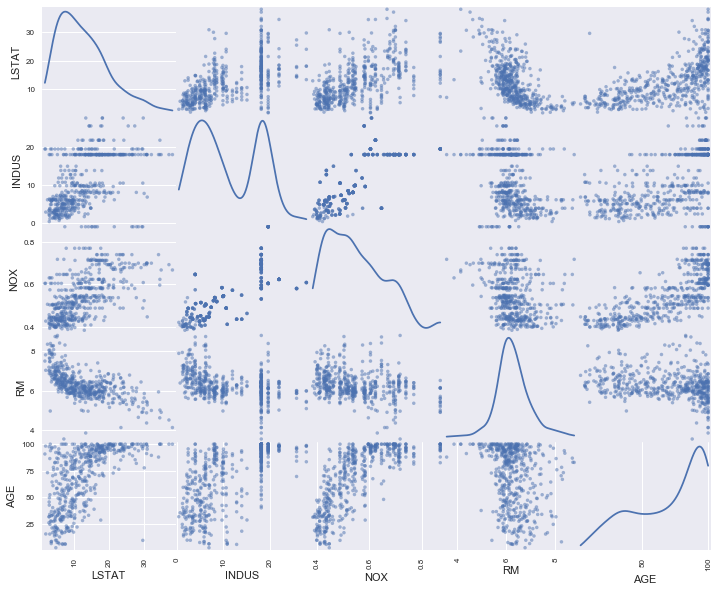

In [21]:
scatter_matrix(x,figsize=(12,10), diagonal='kde')

Se observan tendencias lineales y cuadraticas. Por ejemplo las variables *NOX* y *AGE* presentan una relacion lineal.

* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [22]:
correl=np.corrcoef(df.loc[:,['LSTAT','INDUS','NOX', 'RM', 'AGE','MEDV']])
print(correl)
print(correl.shape)

[[ 1.          0.99075004  0.97819441 ...,  0.98581972  0.98307924
   0.95808787]
 [ 0.99075004  1.          0.94982287 ...,  0.99668853  0.99682335
   0.98682013]
 [ 0.97819441  0.94982287  1.         ...,  0.94907484  0.942261
   0.89591008]
 ..., 
 [ 0.98581972  0.99668853  0.94907484 ...,  1.          0.99973225
   0.98987793]
 [ 0.98307924  0.99682335  0.942261   ...,  0.99973225  1.          0.99280619]
 [ 0.95808787  0.98682013  0.89591008 ...,  0.98987793  0.99280619  1.        ]]
(506, 506)


In [23]:
c = x.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so)

AGE    RM       0.240265
RM     AGE      0.240265
       NOX      0.302188
NOX    RM       0.302188
RM     INDUS    0.391676
INDUS  RM       0.391676
NOX    LSTAT    0.590879
LSTAT  NOX      0.590879
AGE    LSTAT    0.602339
LSTAT  AGE      0.602339
INDUS  LSTAT    0.603800
LSTAT  INDUS    0.603800
RM     LSTAT    0.613808
LSTAT  RM       0.613808
INDUS  AGE      0.644779
AGE    INDUS    0.644779
       NOX      0.731470
NOX    AGE      0.731470
       INDUS    0.763651
INDUS  NOX      0.763651
LSTAT  LSTAT    1.000000
NOX    NOX      1.000000
INDUS  INDUS    1.000000
RM     RM       1.000000
AGE    AGE      1.000000
dtype: float64


Bono: heatmap using seaborn

In [24]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/orlandovillate/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


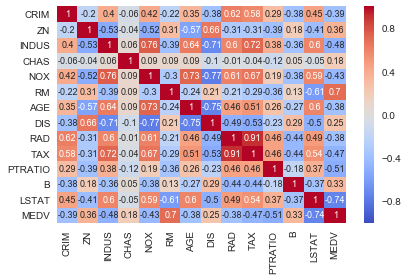

In [27]:
sns.heatmap(data=df.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":9})
plt.tight_layout()
plt.show()

Tenemos entonces que entre las variables existe una fuerte correlación entre:

RAD (index of accessibility to radial highways) y TAX (full-value property-tax rate per 10,000 USD) con un valor de 0.91

Por otro lado, las variables que muestran una mayor correlación con el MEDV son:

LSTAT(% lower status of the population) con un valor de -0.74 y RM (average number of rooms per dwelling) con un valor de 0.7.

****************************************************************************************************************************************************************

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [29]:
d1=pd.concat([x.RM, y], axis=1)

In [30]:
d1.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [31]:
d2=pd.concat([x.LSTAT, y], axis=1)

In [32]:
d2.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train_d1, x_test_d1, y_train_d1, y_test_d1 = train_test_split(d1.iloc[:,0:1], d1.iloc[:,1:], test_size=.3, random_state = 1)

In [35]:
y_test_d1.shape

(152, 1)

In [36]:
y_train_d1.shape

(354, 1)

In [37]:
x_train_d2, x_test_d2, y_train_d2, y_test_d2 = train_test_split(d2.iloc[:,0:1], d2.iloc[:,1:], test_size=.3, random_state = 1)

In [38]:
y_test_d2.shape

(152, 1)

In [39]:
y_train_d2.shape

(354, 1)

* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
linearReg_d1 = LinearRegression(fit_intercept =True, n_jobs=-1)
linearReg_d1.fit(x_train_d1, y_train_d1)
y_pre = linearReg_d1.predict(x_test_d1)

In [42]:
print('mean_squared_error d1: \n', str(mean_squared_error(y_pre, y_test_d1)))

mean_squared_error d1: 
 36.5172147308


In [43]:
linearReg_d2 = LinearRegression(fit_intercept =True, n_jobs=-1)
linearReg_d2.fit(x_train_d2, y_train_d2)
y_pre = linearReg_d2.predict(x_test_d2)

In [44]:
print('mean_squared_error d2: \n', str(mean_squared_error(y_pre, y_test_d2)))

mean_squared_error d2: 
 42.6202434715


* Print the values of $ w $ and $ w_0 $ of the regression equation

In [45]:
linearReg_d1.coef_

array([[ 8.46109164]])

In [46]:
linearReg_d2.coef_

array([[-0.9166916]])

   * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data

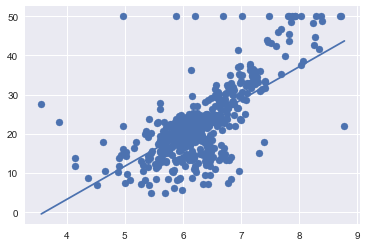

In [47]:
#D1 :  X='RM',  y='MEDV'
x_new = np.linspace(3.561, 8.78, 100)
y_new = linearReg_d1.predict(pd.DataFrame(x_new))
plt.scatter(d1.iloc[:,0:1], d1.iloc[:,1:])
plt.plot(x_new, y_new)

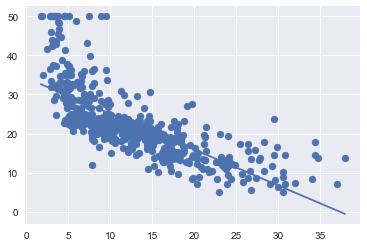

In [48]:
#D2 :  X='LSTAT',  y='MEDV'
x_new = np.linspace(1.73, 37.97, 100)
y_new = linearReg_d2.predict(pd.DataFrame(x_new))
plt.scatter(d2.iloc[:,0:1], d2.iloc[:,1:])
plt.plot(x_new, y_new)

* How does the model perform on $ D_1 $ and $ D_2 $? Why?

Evaluado en D1 tenemos que el MSE es menor respecto a D2, gráficamente vemos que los datos de D1 se ajustan mejor al modelo de regresión generado a diferencia de lo que ocurre con D2.

********************************************************************************************************************

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 1)

In [50]:
linearReg = LinearRegression(fit_intercept =True, n_jobs=-1)
linearReg.fit(x_train, y_train)
y_pre = linearReg.predict(x_test)

In [51]:
print('mean_squared_error: \n', str(mean_squared_error(y_pre, y_test)))

mean_squared_error: 
 28.6809020514


* Train a regression model using `MLPRegressor` in order to predict the output variable ` MEDV`.
     * Report the mean square error on the test set

In [52]:
from sklearn.neural_network import MLPRegressor

In [53]:
nn = MLPRegressor(activation="relu", hidden_layer_sizes=(10,10,3), verbose=False, max_iter=15000)
nn.fit(x_train, y_train)
y_pred = nn.predict(x_test)

In [54]:
print('mean_squared_error: \n', str(mean_squared_error(y_pred, y_test)))

mean_squared_error: 
 19.0587435848


* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc_x = StandardScaler()
sc_x.fit(x)
X_train_s = sc_x.transform(x_train)
X_test_s = sc_x.transform(x_test)

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

##### 1. Train a linear regression model using the scaled data.

In [57]:
linearReg = LinearRegression(fit_intercept =True, n_jobs=-1)
linearReg.fit(X_train_s, y_train)
y_pre = linearReg.predict(X_test_s)

In [58]:
print("Mean squarred error linearReg: " + str(mean_squared_error(y_pre, y_test)))

Mean squarred error linearReg: 28.6809020514


##### 2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the scaled data.

In [59]:
nn = MLPRegressor(hidden_layer_sizes=(128, 512), max_iter=15000)
nn.fit(X_train_s, y_train)
y_pre = nn.predict(X_test_s)

In [60]:
print("Mean squared error nn: " + str(mean_squared_error(y_pre, y_test)))

Mean squared error nn: 11.8661194976


##### 3. Which model has better performance? Why?

El modelo de la red neuronal tiene un rendimiento mucho mejor que la regresion. Esto se debe a que la normalizacion de los datos:
    * El entrenamiento es mucho mas rapido.
    * Previene de quedarse estancado en un minimo local.

Ahora miremos como podemos mejorar la prediccion seleccionando diferentes parametros:

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [64]:
print(stats.randint(4, 12))

In [65]:
parameter_distributions = {
    'hidden_layer_sizes': [(100), (100,100), (100,100,100), (100,100,100,100)],
    'learning_rate':["constant", "invscaling", "adaptive"],
    'activation': ["relu", "logistic", "tanh", "identity"]
}

In [66]:
nn = MLPRegressor(max_iter=5000)
random_search = RandomizedSearchCV(nn, parameter_distributions, n_iter=5, scoring="neg_mean_squared_error", verbose=True)

In [67]:
random_search.fit(X_train_s, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   19.3s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params={}, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'hidden_layer_sizes': [100, (100, 100), (100, 100, 100), (100, 100, 100, 100)], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'activation': ['relu', 'logistic', 'tanh', 'identity']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=True)